In [19]:
import  pandas as pd
import numpy as np
import seaborn as sbn
from matplotlib import pyplot as plt
import os


In [20]:
data=pd.read_csv('adult_train.csv')


In [8]:
data

,Age,Workclass,fnlwgt,Education,Education_Num,Martial_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours_per_week,Country,Target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


<AxesSubplot:xlabel='Sex', ylabel='Age'>

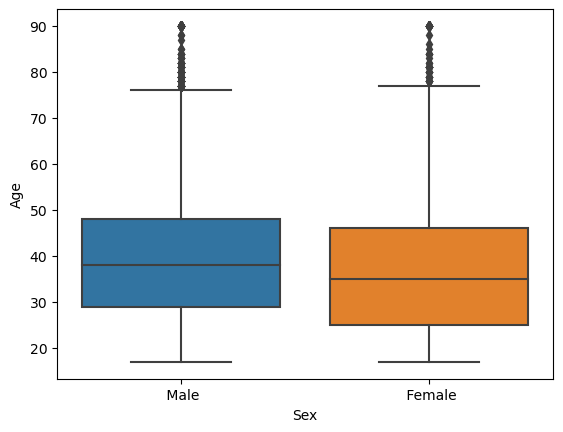

In [21]:
sbn.boxplot(y = 'Age',x = 'Sex', data=data)

In [22]:
data.describe()

,Age,fnlwgt,Education_Num,Capital_Gain,Capital_Loss,Hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32561 non-null  int64 
 1   Workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   Education       32561 non-null  object
 4   Education_Num   32561 non-null  int64 
 5   Martial_Status  32561 non-null  object
 6   Occupation      30718 non-null  object
 7   Relationship    32561 non-null  object
 8   Race            32561 non-null  object
 9   Sex             32561 non-null  object
 10  Capital_Gain    32561 non-null  int64 
 11  Capital_Loss    32561 non-null  int64 
 12  Hours_per_week  32561 non-null  int64 
 13  Country         31978 non-null  object
 14  Target          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [27]:
data.Country.value_counts()

 United-States                 29170
 Mexico                          643
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 France                           29
 

In [28]:
%matplotlib inline

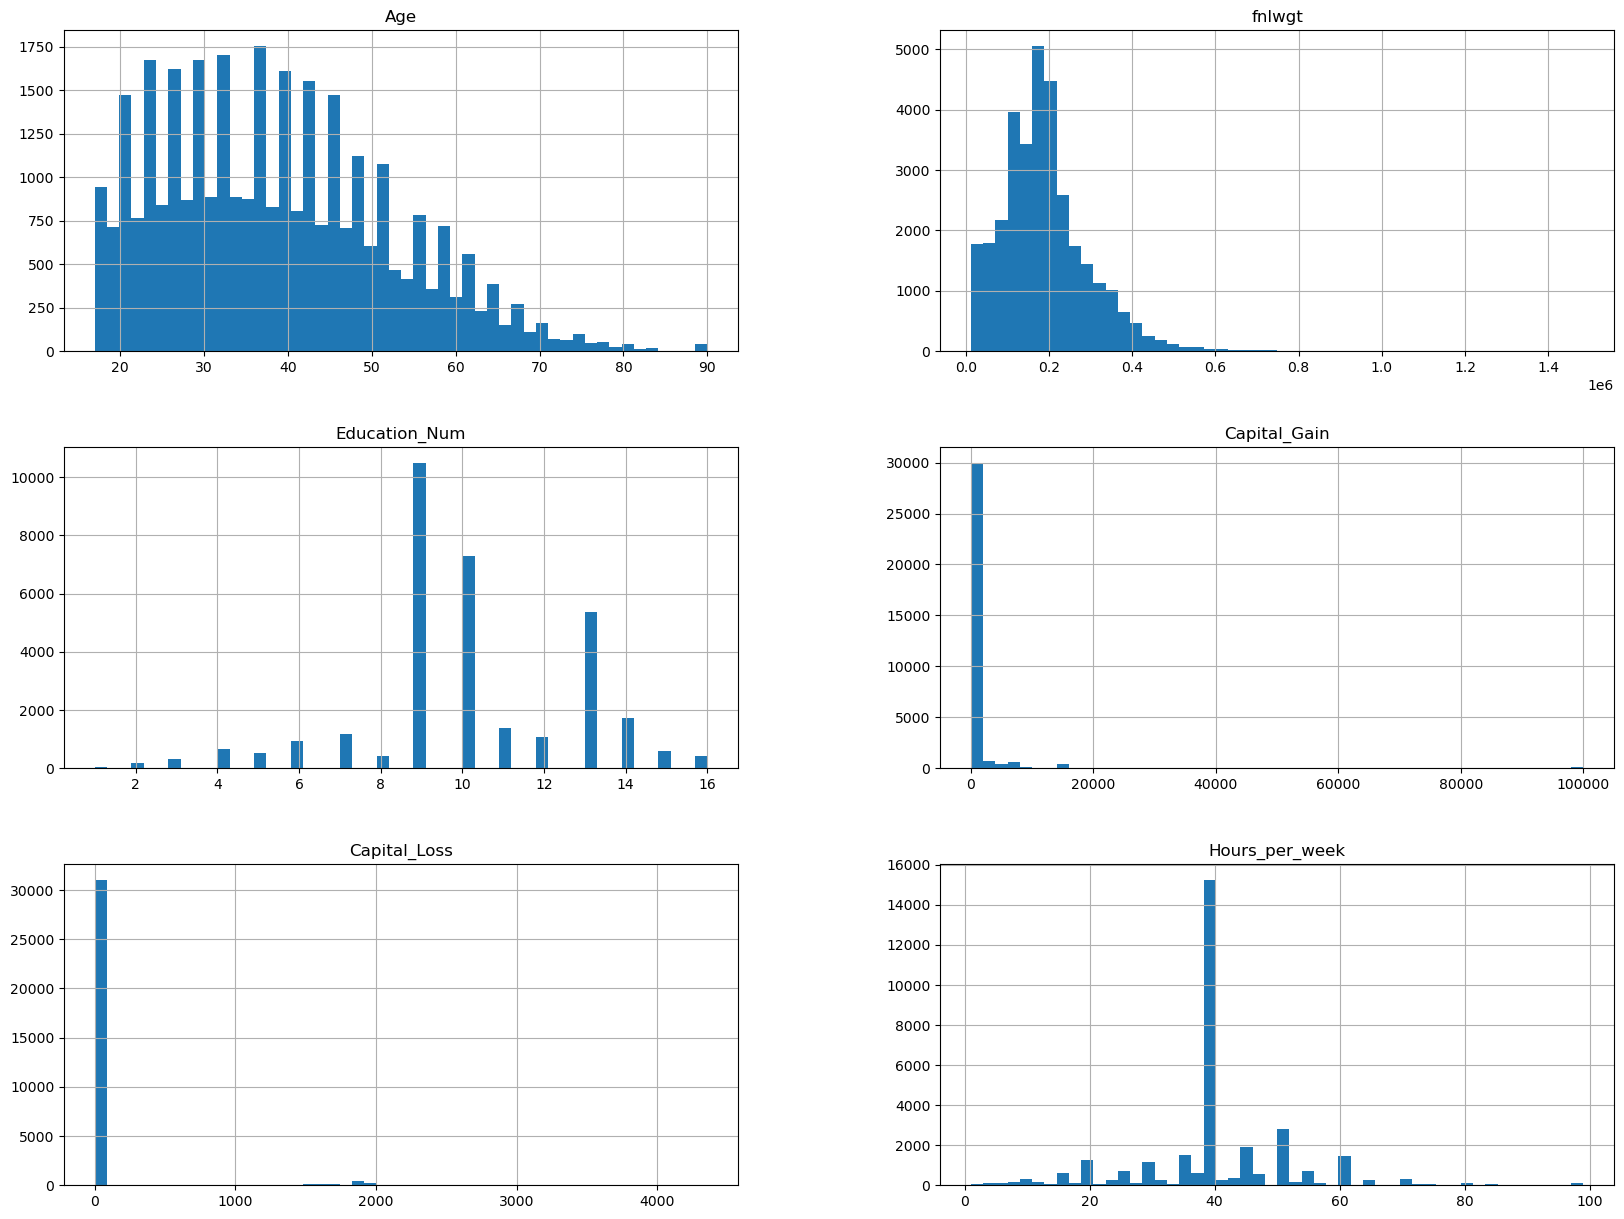

In [29]:
data.hist(bins=50,figsize=(20,15))
plt.show();

In [30]:
print("Education Num range:", data["Education_Num"].min(), data["Education_Num"].max())
print("Capital Gain range:", data.Capital_Gain.min(),data.Capital_Gain.max())
print("Capital Loss range:", data.Capital_Loss.min(),data.Capital_Loss.max() )

Education Num range: 1 16
Capital Gain range: 0 99999
Capital Loss range: 0 4356


In [31]:
def split_train_test(data,test_ratio,random_state=42):
    np.random.seed(random_state)
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(test_ratio * len(data))
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices],data.iloc[test_indices]

train_set,test_set = split_train_test(data,0.2)
print("Train set length:", len(train_set))
print("Test set length:", len(test_set))

Train set length: 26049
Test set length: 6512


In [32]:
from zlib import crc32
def test_set_check(identifier,test_ratio):
    return crc32(np.int64(identifier) & 0xffffffff) < test_ratio

def split_train_test_by_id(data,test_ratio,id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_,test_ratio))
    return data.loc[~in_test_set],data.loc[in_test_set]


In [33]:
data_with_id = data.reset_index()
train_set,test_set = split_train_test_by_id(data_with_id,0.2,"index")

In [34]:
data_with_id['EduHour_index'] = data.Education_Num * 1000 + data.Hours_per_week
train_set,test_set = split_train_test_by_id(data_with_id,0.2,"EduHour_index")

In [35]:
from sklearn.model_selection import train_test_split

train_set,test_set = train_test_split(data,test_size = 0.2,random_state = 42 )

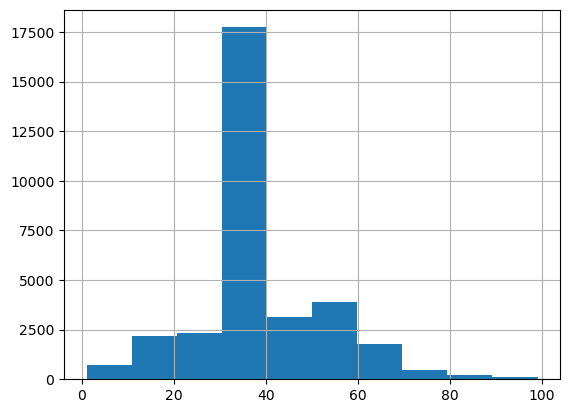

In [36]:
data['Hours_per_week'].hist();

In [39]:
data['Hours_category'] = pd.cut(data['Hours_per_week'],bins=[0.,15,30,45,60, np.inf],labels=[10,20,30,40,50])

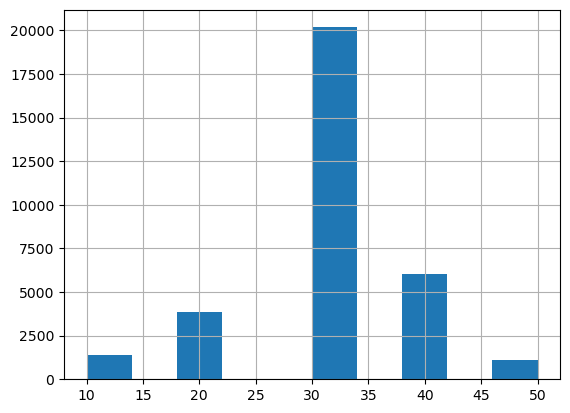

In [40]:
data.Hours_category.hist();

In [41]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1,test_size=0.2, random_state=42)
for train_index, test_index in split.split(data,data['Hours_category']):
    print(train_index)
    strat_train_set = data.loc[train_index]
    strat_test_set = data.loc[test_index]

[14338 15601 26702 ...  8128  8961 24256]


In [42]:
for set_ in (strat_train_set,strat_test_set):
    set_.drop("Hours_category",axis=1,inplace=True)

In [43]:
data = strat_train_set.copy()

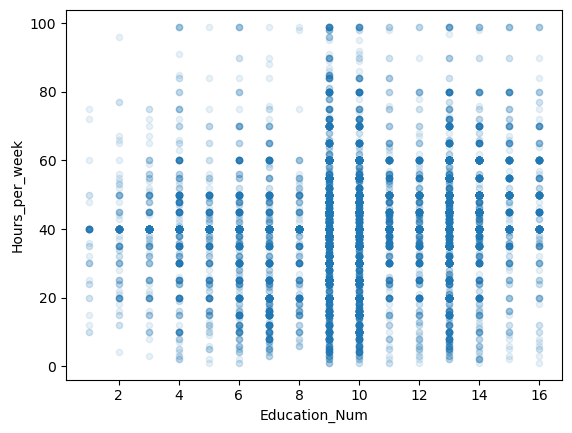

In [44]:
data.plot(kind='scatter',x='Education_Num',y = 'Hours_per_week',alpha = 0.1);

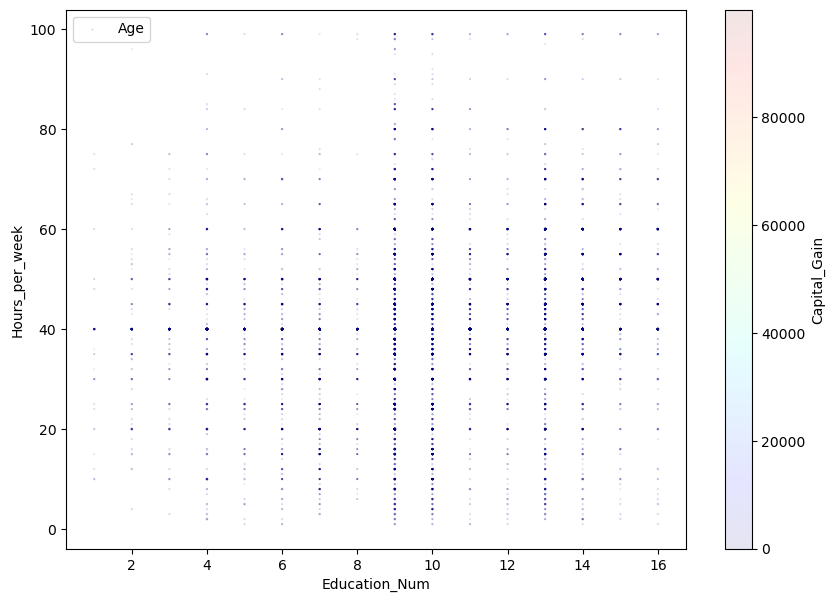

In [45]:
data.plot(kind='scatter',x='Education_Num',y = 'Hours_per_week',alpha = 0.1,s=data['Age']/100,label='Age',figsize=(10,7),c='Capital_Gain',cmap = plt.get_cmap('jet'),colorbar=True)
plt.legend()

In [46]:
data

,Age,Workclass,fnlwgt,Education,Education_Num,Martial_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours_per_week,Country,Target
14338,20,Private,50397,HS-grad,9,Never-married,Adm-clerical,Own-child,Black,Male,0,0,20,United-States,<=50K
15601,32,Private,125856,Assoc-acdm,12,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,60,United-States,>50K
26702,35,Self-emp-not-inc,468713,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,<=50K
4997,47,Self-emp-inc,212120,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,>50K
2754,80,Self-emp-not-inc,184335,7th-8th,4,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21092,39,Private,347814,Assoc-acdm,12,Never-married,Other-service,Own-child,White,Female,0,0,56,United-States,<=50K
19200,25,Private,190650,Bachelors,13,Never-married,Prof-specialty,Own-child,Asian-Pac-Islander,Male,0,0,40,Taiwan,<=50K
8128,57,Private,255109,HS-grad,9,Never-married,Exec-managerial,Not-in-family,White,Female,0,0,45,United-States,<=50K
8961,59,Self-emp-not-inc,124771,Bachelors,13,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,30,United-States,<=50K


In [47]:
corr_matrix = data.corr()
corr_matrix['Capital_Gain'].sort_values(ascending=False)

Capital_Gain      1.000000
Education_Num     0.126683
Age               0.082363
Hours_per_week    0.082014
fnlwgt            0.001446
Capital_Loss     -0.031776
Name: Capital_Gain, dtype: float64

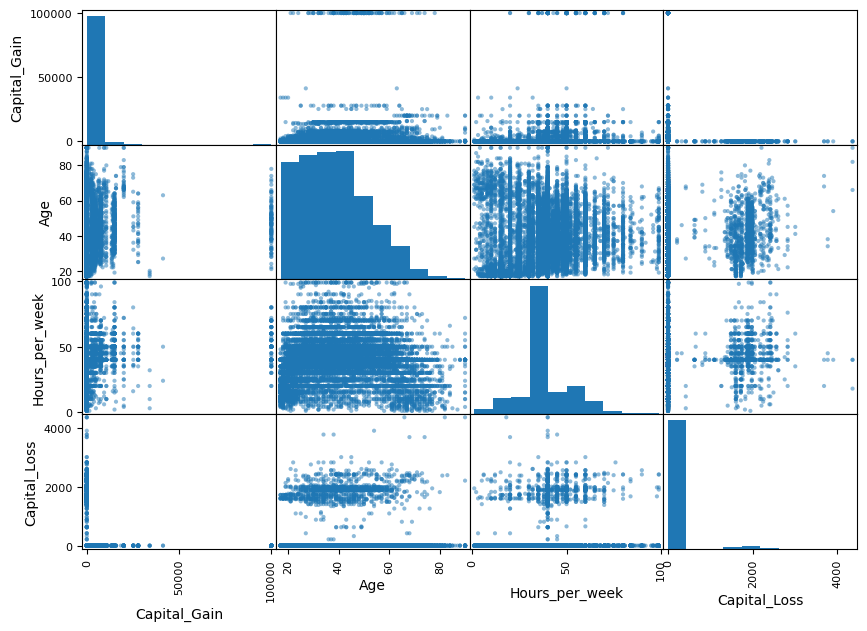

In [48]:
from pandas.plotting import scatter_matrix

attributes = ['Capital_Gain','Age','Hours_per_week','Capital_Loss']
scatter_matrix(data[attributes],figsize=(10,7));

<AxesSubplot:xlabel='Capital_Gain', ylabel='Hours_per_week'>

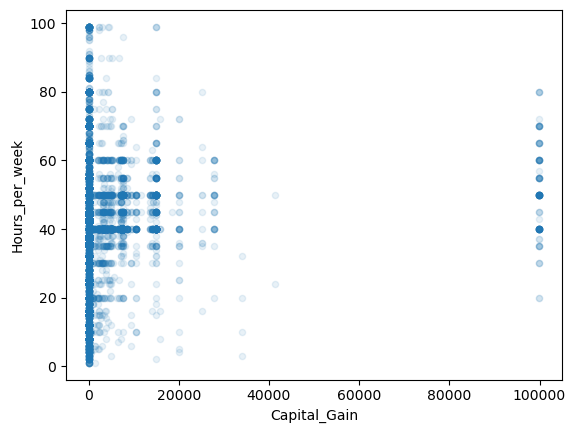

In [50]:
data.plot(kind='scatter',x='Capital_Gain',y='Hours_per_week',alpha=0.1)

In [51]:
data

,Age,Workclass,fnlwgt,Education,Education_Num,Martial_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours_per_week,Country,Target
14338,20,Private,50397,HS-grad,9,Never-married,Adm-clerical,Own-child,Black,Male,0,0,20,United-States,<=50K
15601,32,Private,125856,Assoc-acdm,12,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,60,United-States,>50K
26702,35,Self-emp-not-inc,468713,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,<=50K
4997,47,Self-emp-inc,212120,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,>50K
2754,80,Self-emp-not-inc,184335,7th-8th,4,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21092,39,Private,347814,Assoc-acdm,12,Never-married,Other-service,Own-child,White,Female,0,0,56,United-States,<=50K
19200,25,Private,190650,Bachelors,13,Never-married,Prof-specialty,Own-child,Asian-Pac-Islander,Male,0,0,40,Taiwan,<=50K
8128,57,Private,255109,HS-grad,9,Never-married,Exec-managerial,Not-in-family,White,Female,0,0,45,United-States,<=50K
8961,59,Self-emp-not-inc,124771,Bachelors,13,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,30,United-States,<=50K


In [52]:
data['Age_per_Education'] = data['Age'] / data['Education_Num']
data['Education_per_Gain'] = data['Education_Num'] / data.Capital_Gain
data['Gain_per_Education'] = data['Capital_Gain'] / data.Education_Num

In [53]:
corr_matrix = data.corr()
corr_matrix['Capital_Gain'].sort_values(ascending=False)

Capital_Gain          1.000000
Gain_per_Education    0.902673
Education_Num         0.126683
Age                   0.082363
Hours_per_week        0.082014
fnlwgt                0.001446
Age_per_Education    -0.013341
Capital_Loss         -0.031776
Education_per_Gain   -0.243319
Name: Capital_Gain, dtype: float64

In [54]:
needed_features = ['Age','Age_per_education','Education_per_Gain','Education_Num','Capital_Gain','Capital_Loss']

In [55]:
data = strat_train_set.drop('Capital_Gain',axis=1)
housing_labels = strat_train_set['Capital_Gain'].copy()

In [56]:
data.dropna(subset=['Hours_per_week'])
data.drop('Hours_per_week',axis = 1)
median = data['Hours_per_week'].median()
data.Hours_per_week.fillna(median,inplace=True)

In [57]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')

In [59]:
data_category = data[['Workclass']]
data_category

,Workclass
14338,Private
15601,Private
26702,Self-emp-not-inc
4997,Self-emp-inc
2754,Self-emp-not-inc
...,...
21092,Private
19200,Private
8128,Private
8961,Self-emp-not-inc


In [60]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()

In [61]:
category_encoded = ordinal_encoder.fit_transform(data_category)
category_encoded[:10]

array([[ 3.],
       [ 3.],
       [ 5.],
       [ 4.],
       [ 5.],
       [nan],
       [ 3.],
       [ 3.],
       [ 3.],
       [ 4.]])

In [62]:
ordinal_encoder.categories_

[array([' Federal-gov', ' Local-gov', ' Never-worked', ' Private',
        ' Self-emp-inc', ' Self-emp-not-inc', ' State-gov', ' Without-pay',
        nan], dtype=object)]

In [63]:
from sklearn.preprocessing import OneHotEncoder
onehotEnconder = OneHotEncoder()
data_category_one_hot = onehotEnconder.fit_transform(data_category)
data_category_one_hot.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])